# 이산형 확률분포

## 1차원 이산형 확률분포

 - 확률변수는 변수가 취할 수 있는 값과, 그 값이 나오는 확률에 의해 정의
 - 확률변수 X가 취할 수 있는 값에 대한 집합을 x1,x2,...xk라고 했을 때
 - 확률 변수 X가 xk라는 값을 취하는 확률은 pk라고 하자.
 
 * 확률질량함수의 정의
  - P(X = xk) = pk라고 정의할 수 있다.
  - f(x) = P(X = x), 확률은 변수가 취할 수 있는 값 x을 인수로 하는 함수로 볼 수 있다.
 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 1차원 이산확률분포의 정의

In [2]:
# 임의로 각 x마다 확률이 다른 주사위를 만든 것

x_set = np.array([1, 2, 3, 4, 5, 6])

In [7]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [8]:
X = [x_set, f]
X

[array([1, 2, 3, 4, 5, 6]), <function __main__.f(x)>]

In [14]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
summary1 = dict(zip(x_set, prob))
summary1

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

* 확률분포(probability mass function)
 - 확률변수가 취할 수 있는 값과, 그 확률의 구체적인 대응

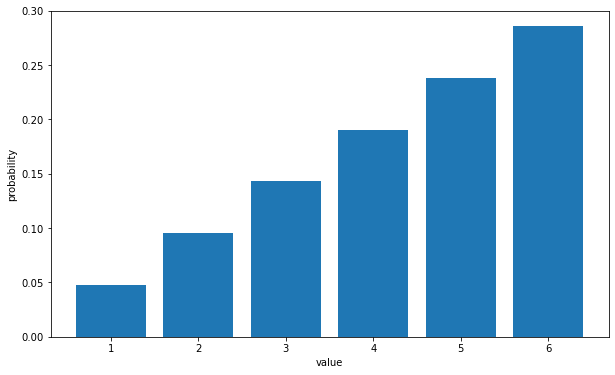

In [10]:
# 확률분포 확인하는 code

fig = plt.figure(figsize=(10, 6))    # 크기
ax = fig.add_subplot(111)            # (1,1,1)
ax.bar(x_set, prob)                  # bar로 만들기
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

* 확률의 성질
 - 무조건 0 이상
 - 모든 확률을 더하면 1이 되어야 한다.
 

In [11]:
# 확률이 모두 0 이상인지 확인하는 함수
# 모두 0 이상일 경우 True return, 하나라도 0일 경우 False return
np.all(prob >= 0)

True

In [12]:
# 모든 확률의 합 = 1
np.sum(prob)

0.9999999999999999

# 누적확률함수
 - 확률변수 X가 x 이하가 될 때의 확률을 반환하는 함수
 - F(x) = P(X <= x)


In [13]:
# 누적확률 함수 만드는 식

def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [17]:
# x = 3일때 확률 값
summary1[3]

0.14285714285714285

In [19]:
# x=3일때 누적확률함수값
F(3)

0.2857142857142857

# 확률변수의 변환
 - 확률변수 X에 2를 곱하고 3을 더했다고 생각하자. ( 원래 확률변수 X : {1,2,3,4,5,6} )
 - Y = 2X + 3이라고 할 때, Y가 취할 수 있는 값은 {5,7,9,11,13,15}가 되고, 이 각각의 Y에 따라 확률이 정해지게 된다.

In [12]:
# 각각의 x_k에 대해 (x_k * 2 + 3)을 한 Y 만들기
y_set = np.array([2 * x_k + 3 for x_k in x_set])

# 새로 만든 y_set과 확률을 연결한 형태
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

### 1차원 이산형 확률변수의 지표

#### 평균

# 확률변수의 평균
 - 확률변수를 무제한으로 시행하여 얻어진 실현값의 평균

# 이산형 확률변수의 경우
 - 확률변수의 평균은 확률변수가 취할 수 있는 값과 그 확률의 곱의 총합
 
# 확률변수의 평균은 기댓값, expect value라고 부른다. ( μ: 뮤 )

In [13]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [14]:
# 확률변수의 기댓값은 확률변수를 무제한으로 시행하여 얻은 실현값의 평균
# 10^6, 100만번 돌렸다고 가정하고 평균을 구했다.
# 위처럼 확률변수와 그 때의 확률의 곱의 합과 동일하게 나온다.

sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334756

확률변수의 분산 및 공분산의 '정의'도 마찬가지로
무제한으로 시행해서 얻은 실현값의 데이터로 적용한다.

In [15]:
# 확률변수의 기댓값을 구하는 함수를 E(x)로 정의
# E는 expect의 e를 따왔다.

def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [16]:
E(X)

4.333333333333333

변환된 확률변수, Y = 2X+3에 대해 expect value를 구해보자.
변환한 확률변수의 기댓값은 (2x+3) * f(x_k)의 총합으로 생각하면 된다.
확률변수 X의 expect value를 구하는 공식과 동일하다.

In [17]:
# 변환한 확률변수 Y의 기댓값을 구해보자.

E(X, g=lambda x: 2*x + 3)

11.666666666666664

# 기댓값은 선형성을 가지고 있다. ( linearity )

# 선형성(linearity)이란?
 - 선형성은 중첩의 원리가 적용될 수 있다는 뜻이다.
 - .. 더 정리

In [18]:
2 * E(X) + 3

11.666666666666666

#### 분산

# 분산은 우리가 원래 알고 있던 것처럼 편차 제곱의 기댓값이 된다.
 - 원래 각 데이터에서 평균을 뺀것의 제곱을 했던 것처럼,
 - 편차의 제곱에 각 확률이 곱해진 형태이다.
 - 분산은 V(X)라고 나타내고, 시그마 제곱(σ^2)라고 표현한다.
 - σ는 확률변수 X의 표준편차라고 한다.

In [19]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [20]:
# 분산 구하는 함수 V 구현

def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [21]:
V(X)

2.2222222222222223

# 변환한 확률변수의 분산 구하는 방법
V(2X+3) = 2^2 * V(X)
3이 무시되는 이유는?

In [22]:
V(X, lambda x: 2*x + 3)

8.88888888888889

In [23]:
2**2 * V(X)

8.88888888888889

## 2차원 이산형 확률분포

2차원 확률변수는 1차원 확률분포 2개를 동시에 다룬다(X, Y)

취할 수 있는 값이 2개가 된다. X,Y
그러므로 확률변수 X,Y 2개를 같이 적용한 확률을 구해야 한다.

확률변수 X가 xi, Y가 yi를 취하는 확률은 
P(X=xi, Y=yi) = pij라고 표현할 수 있다.


확률변수 (X,Y)의 움직임을 동시에 고려한 분포가 결합확률분포,
joint probability distribution이라고 한다.

 - 이 책에서는 주사위 A,B에 대해 하나의 확률 변수 X는 주사위 1개만, Y는 주사위 A의 값과 B의 값을 더한 확률변수로 문제 풀이


130p 내용

### 2차원 이산형 확률분포의 정의

In [24]:
# X, Y가 취할 수 있는 기댓값을 정의
# X는 주사위 A, B을 더한 값이므로, 2~ 12까지
# Y는 주사위 A, 하나이므로 1~6

x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [25]:
# 결합확률함수 정의
# x-y는 무조건 1~6 사이이다.


def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [26]:
XY = [x_set, y_set, f_XY]

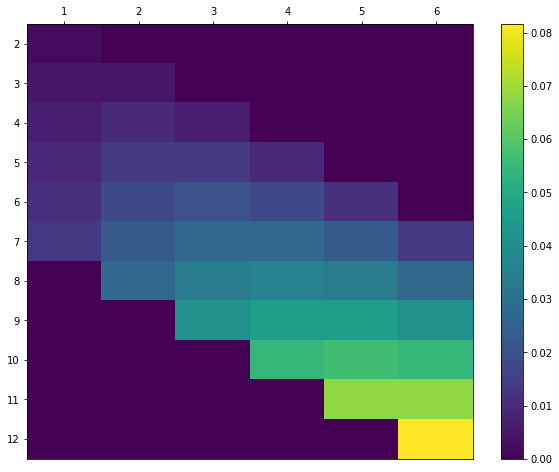

In [27]:
# matplot 라이브러리 사용

prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [28]:
# 모든 확률이 0 이상인지 check

np.all(prob >= 0)

True

In [29]:
# 모든 확률의 합 = 1

np.sum(prob)

1.0

In [30]:
# Y가 취할 수 있는 값 모두를 대입하고 모두 더한 것이 확률변수 X에 대한 확률함수

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [31]:
# 확률변수 Y에 대한 확률함수는 X가 취할 수 있는 값 모두를 대입하고 더한 것
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [33]:
X = [x_set, f_X]
Y = [y_set, f_Y]

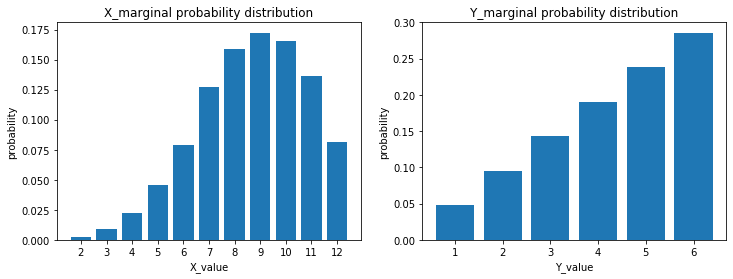

In [34]:
# matplotlib로 구현, 각 확률변수 X, Y에 대한 확률분포!

prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)     #(1,2,1)
ax2 = fig.add_subplot(122)     #(1,2,2)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

### 2차원 이산형 확률분포의 지표

2차원 이산형 확률변수에 관해서는 공분산, 상관계수라는 지표를 정의할 수 있다.
앞의 3장처럼 변수 2개에 대해 분산을 구하는 것과 동일.

X의 기댓값, expect value는 각각의 x일 때의 확률을 곱해서 모두 더한 값이다.

In [35]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [36]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [37]:
# X의 기댓값 구하기

mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [38]:
# Y의 기댓값 구하기

mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

In [39]:
a, b = 2, 3

In [40]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [41]:
a * mean_X + b * mean_Y

30.333333333333332

In [42]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444444444444444

In [43]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [44]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [45]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

In [46]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [47]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

In [48]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [49]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.44444444444443

In [50]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071067811865474